In [247]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re

In [248]:
df_data = pd.read_csv("data.csv", encoding="cp1252")
df_new_kamusalay = pd.read_csv('new_kamusalay.csv', encoding="cp1252")
df_abusive = pd.read_csv('abusive.csv', encoding="cp1252")

In [249]:
# Melihat shape dari dataframe
total_rows, total_attributes = df_data.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat 5 elemen pertama dari dataset
df_data.head()

Jumlah data: 13169
Jumlah atribut: 13


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [250]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [251]:
df_data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Pembersihan Data

In [252]:
# cek missing value
df_data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [253]:
# cek duplikasi data
df_data.duplicated().sum()

125

In [254]:
# menghilangkan duplikasi data
df_data = df_data.drop_duplicates()
df_data.shape

(13044, 13)

In [255]:
# Visualisasi distribusi label
labels = ["HS", "Abusive", "HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong"]
for label in labels:
    count = df_data[label].sum()
    print(f"{label}: {count}")

HS: 5518
Abusive: 5005
HS_Individual: 3540
HS_Group: 1978
HS_Religion: 789
HS_Race: 563
HS_Physical: 322
HS_Gender: 304
HS_Other: 3706
HS_Weak: 3348
HS_Moderate: 1698
HS_Strong: 472


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


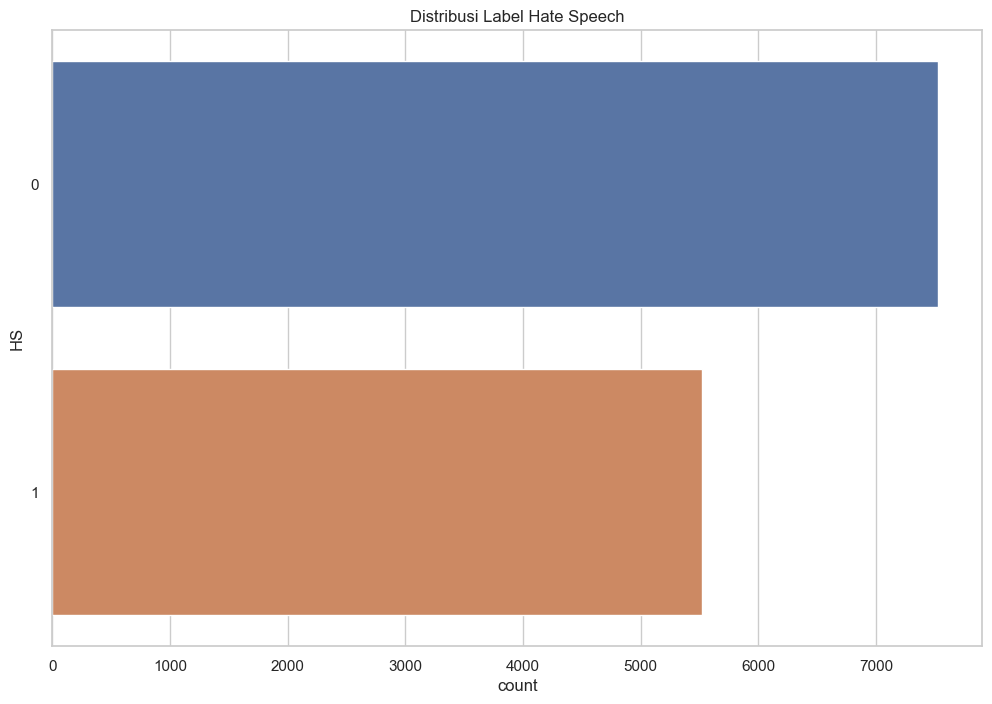

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


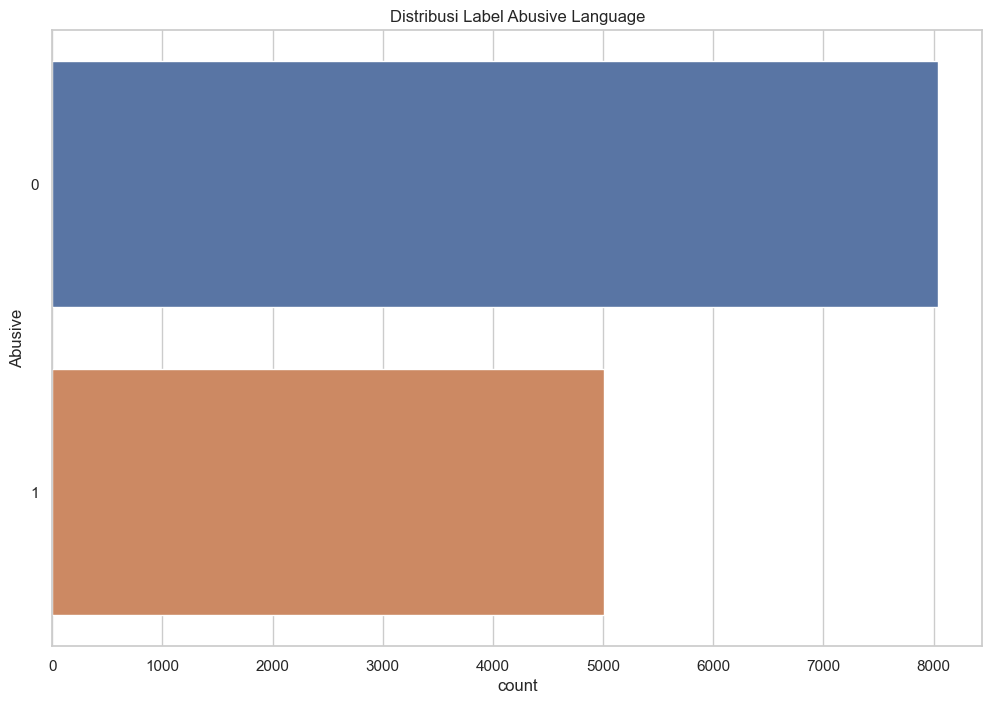

In [256]:
# Plotting distribusi label
plt.figure(figsize=(12, 8))
sns.countplot(data=df_data, y="HS")
plt.title("Distribusi Label Hate Speech")
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df_data, y="Abusive")
plt.title("Distribusi Label Abusive Language")
plt.show()

# Analisis EDA

In [257]:
print(df_new_kamusalay.columns)

Index(['anakjakartaasikasik', 'anak jakarta asyik asyik'], dtype='object')


In [258]:
# Membuat kamus slang
slang_dict = pd.Series(df_new_kamusalay.iloc[:, 1].values, index=df_new_kamusalay.iloc[:, 0]).to_dict()

In [259]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    # Mengganti slang dengan bentuk formal
    for word in text.split():
        if word.lower() in slang_dict:
            text = text.replace(word, slang_dict[word.lower()])
    
    # Menghapus karakter khusus dan angka, serta mengubah ke lowercase
    text = re.sub('@[^\text]+', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = text.lower()
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text)
    text = re.sub('pengguna',' ', text)
    text = re.sub('rt',' ', text)
    return text

In [260]:
# Membersihkan teks pada dataset
df_data['Tweet Text After Cleansing'] = df_data['Tweet'].apply(clean_text)

# Contoh pembersihan
df_data['Tweet Text After Cleansing'].head()

subset = df_data[["Tweet Text After Cleansing", "HS", "Abusive"]]
subset.head(10)

,Tweet Text After Cleansing,HS,Abusive
0,di saat semua cowok berusaha melacak perhati...,1,1
1,siapa yang telat memberi tau elu edan s...,0,1
2,41 kadang aku berfikir kenapa aku tetap perc...,0,0
3,aku itu aku nku tau matamu sipit tapi di...,0,0
4,kaum cebong kafir sudah kelihatan dungunya...,1,1
5,ya bani taplak dan kawan kawan xf0 x9f x98 ...,1,1
6,deklarasi pilihan kepala daerah 2018 aman dan ...,0,0
7,gue baru saja selesai re watch aldnoah zero ...,0,1
8,nah admin belanja saitu lagi po terbaik nak m...,0,0
9,enak lagi kalau sambil ngewe,0,1


In [261]:
# Hanya Abusive
abusive_tweets = ' '.join(df_data[(df_data['Abusive'] == 1) & (df_data['HS'] == 0)]['Tweet Text After Cleansing'])
abusive_words = abusive_tweets.split()
abusive_word_counts = Counter(abusive_words)

# Hanya HS
hs_tweets = ' '.join(df_data[(df_data['HS'] == 1) & (df_data['Abusive'] == 0)]['Tweet Text After Cleansing'])
hs_words = hs_tweets.split()
hs_word_counts = Counter(hs_words)

# Abusive + HS
abusive_hs_tweets = ' '.join(df_data[(df_data['HS'] == 1) & (df_data['Abusive'] == 1)]['Tweet Text After Cleansing'])
abusive_hs_words = abusive_hs_tweets.split()
abusive_hs_word_counts = Counter(abusive_hs_words)

# Netral
netral_count = df_data[(df_data['HS'] == 0) & (df_data['Abusive'] == 0)].shape[0]
netral_tweets = ' '.join(df_data[(df_data['HS'] == 0) & (df_data['Abusive'] == 0)]['Tweet Text After Cleansing'])
netral_words = netral_tweets.split()
netral_word_counts = Counter(netral_words)

# Contoh menampilkan 10 kata teratas untuk masing-masing kategori
print("Abusive only:", abusive_word_counts.most_common(10))
print("HS only:", hs_word_counts.most_common(10))
print("Abusive + HS:", abusive_hs_word_counts.most_common(10))
print("Netral:", netral_word_counts.most_common(10))

Abusive only: [('xf0', 437), ('x9f', 436), ('yang', 429), ('x98', 363), ('gue', 358), ('tidak', 322), ('di', 257), ('kamu', 220), ('user', 214), ('aku', 200)]
HS only: [('yang', 742), ('jokowi', 557), ('di', 536), ('indonesia', 530), ('tidak', 473), ('dan', 399), ('uniform', 339), ('resource', 339), ('locator', 339), ('komunis', 330)]
Abusive + HS: [('kamu', 919), ('yang', 917), ('xf0', 839), ('x9f', 834), ('tidak', 757), ('x98', 686), ('itu', 528), ('di', 499), ('cebong', 496), ('dan', 442)]
Netral: [('yang', 2789), ('dan', 1934), ('di', 1709), ('tidak', 1389), ('itu', 999), ('ada', 866), ('ini', 832), ('xf0', 794), ('x9f', 785), ('dengan', 737)]


In [262]:
# Fungsi untuk menghilangkan kata-kata dengan pola x...
def clean_unwanted_regex(text, pattern):
    return ' '.join(re.sub(pattern, '', word) for word in text.split())

unwanted_pattern = r'\bx[0-9a-fA-F]+\b'

df_data['Tweet Text After Cleansing'] = df_data['Tweet Text After Cleansing'].apply(lambda text: clean_unwanted_regex(text, unwanted_pattern))

In [263]:
# Menghitung kembali frekuensi kata setelah pembersihan
def recount_word_frequency(df, condition):
    all_text = ' '.join(df.loc[condition, 'Tweet Text After Cleansing'])
    word_counts = Counter(all_text.split())
    return word_counts.most_common(10)

# 'Abusive only'
abusive_word_counts = recount_word_frequency(df_data, (df_data['Abusive'] == 1) & (df_data['HS'] == 0))

# 'HS only'
hs_word_counts = recount_word_frequency(df_data, (df_data['HS'] == 1) & (df_data['Abusive'] == 0))

# 'Abusive + HS'
abusive_hs_word_counts = recount_word_frequency(df_data, (df_data['HS'] == 1) & (df_data['Abusive'] == 1))

# Netral
netral_word_counts = recount_word_frequency(df_data, (df_data['HS'] == 0) & (df_data['Abusive'] == 0))

print("Abusive only:", abusive_word_counts)
print("HS only:", hs_word_counts)
print("Abusive + HS:", abusive_hs_word_counts)
print("Netral:", netral_word_counts)

Abusive only: [('yang', 429), ('gue', 358), ('tidak', 322), ('di', 257), ('kamu', 220), ('user', 214), ('aku', 200), ('itu', 198), ('uniform', 195), ('resource', 195)]
HS only: [('yang', 742), ('jokowi', 557), ('di', 536), ('indonesia', 530), ('tidak', 473), ('dan', 399), ('uniform', 339), ('resource', 339), ('locator', 339), ('komunis', 330)]
Abusive + HS: [('kamu', 919), ('yang', 917), ('tidak', 757), ('itu', 528), ('di', 499), ('cebong', 496), ('dan', 442), ('orang', 348), ('ini', 336), ('kalau', 333)]
Netral: [('yang', 2789), ('dan', 1934), ('di', 1709), ('tidak', 1389), ('itu', 999), ('ada', 866), ('ini', 832), ('dengan', 737), ('orang', 712), ('presiden', 641)]


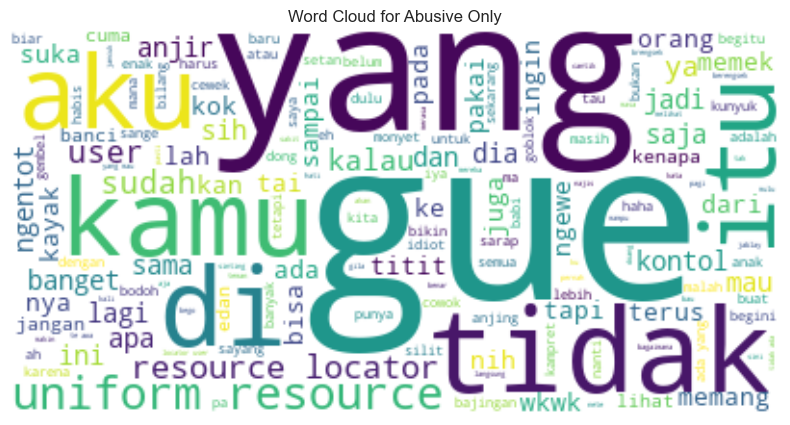

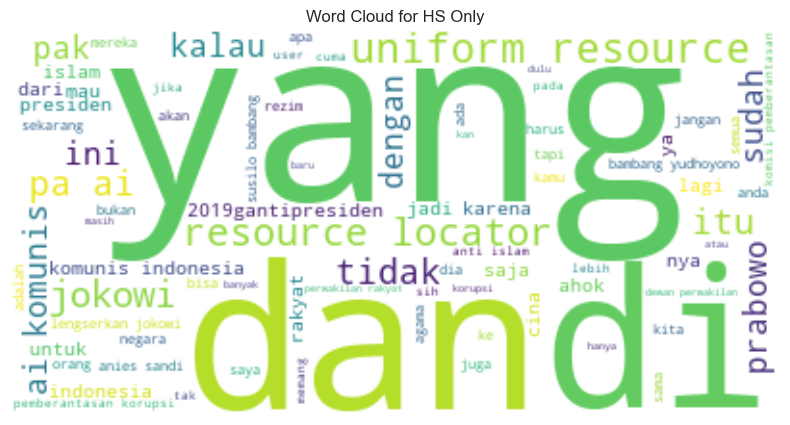

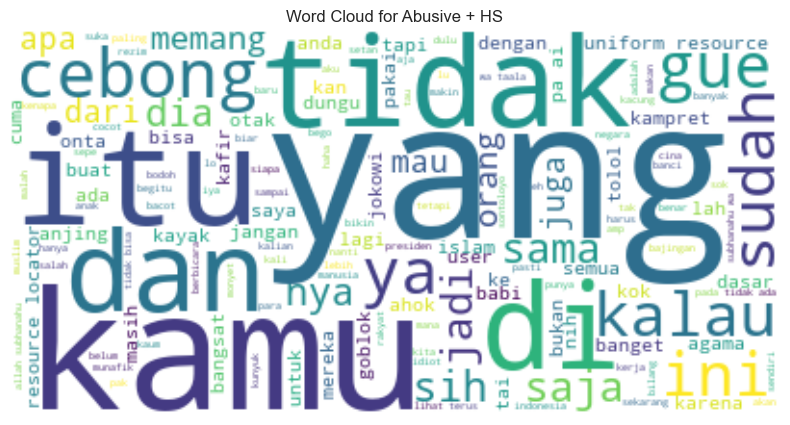

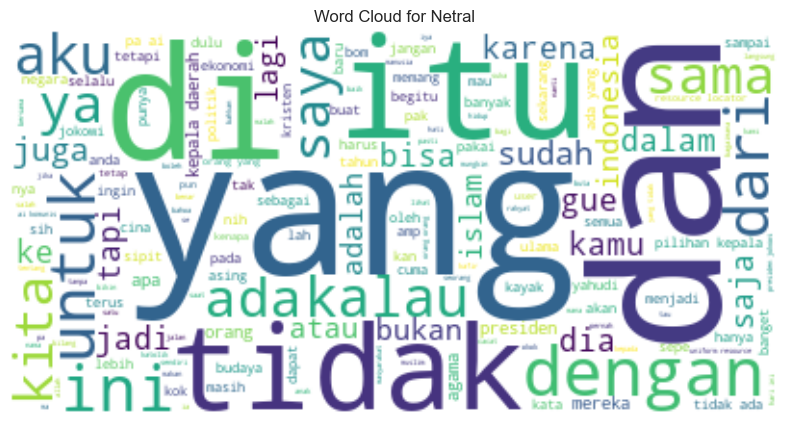

In [264]:
# Membuat word cloud
def create_wordcloud_from_condition(df, condition, title):
    text = ' '.join(df.loc[condition, 'Tweet Text After Cleansing'])
    wordcloud = WordCloud(background_color='white', max_words=200).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

create_wordcloud_from_condition(df_data, (df_data['Abusive'] == 1) & (df_data['HS'] == 0), 'Word Cloud for Abusive Only')
create_wordcloud_from_condition(df_data, (df_data['HS'] == 1) & (df_data['Abusive'] == 0), 'Word Cloud for HS Only')
create_wordcloud_from_condition(df_data, (df_data['HS'] == 1) & (df_data['Abusive'] == 1), 'Word Cloud for Abusive + HS')
create_wordcloud_from_condition(df_data, (df_data['HS'] == 0) & (df_data['Abusive'] == 0), 'Word Cloud for Netral')

# Visualisasi Data

Mean Length: 17.161070223857713
Median Length: 15.0
Mode Length: 0    10
Name: Tweet Text After Cleansing, dtype: int64
Maximum Length: 64


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


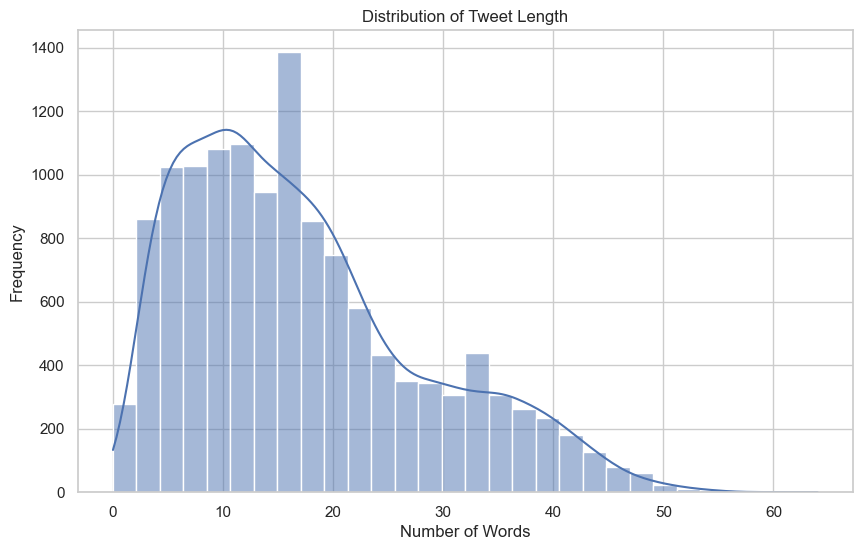

In [265]:
# Hitung mean, median, dan modus
mean_length = df_data['Tweet Text After Cleansing'].apply(lambda x: len(x.split())).mean()
median_length = df_data['Tweet Text After Cleansing'].apply(lambda x: len(x.split())).median()
mode_length = df_data['Tweet Text After Cleansing'].apply(lambda x: len(x.split())).mode()

# Nilai maksimum
max_length = df_data['Tweet Text After Cleansing'].apply(lambda x: len(x.split())).max()

print("Mean Length:", mean_length)
print("Median Length:", median_length)
print("Mode Length:", mode_length)
print("Maximum Length:", max_length)

# Visualisasi histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_data['Tweet Text After Cleansing'].apply(lambda x: len(x.split())), bins=30, kde=True)
plt.title("Distribution of Tweet Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

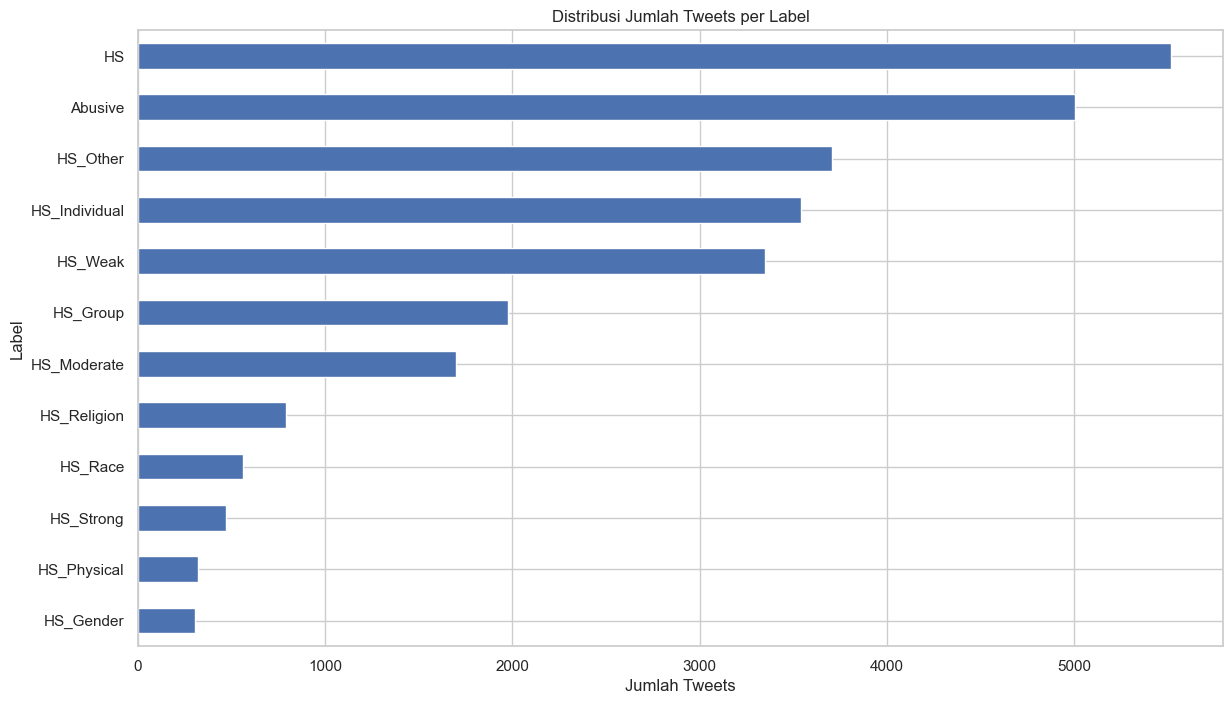

In [266]:
# Set plot style
sns.set(style="whitegrid")

# Plotting distribusi setiap label
plt.figure(figsize=(14, 8))
df_data[labels].sum().sort_values().plot(kind='barh')
plt.title("Distribusi Jumlah Tweets per Label")
plt.xlabel("Jumlah Tweets")
plt.ylabel("Label")
plt.show()

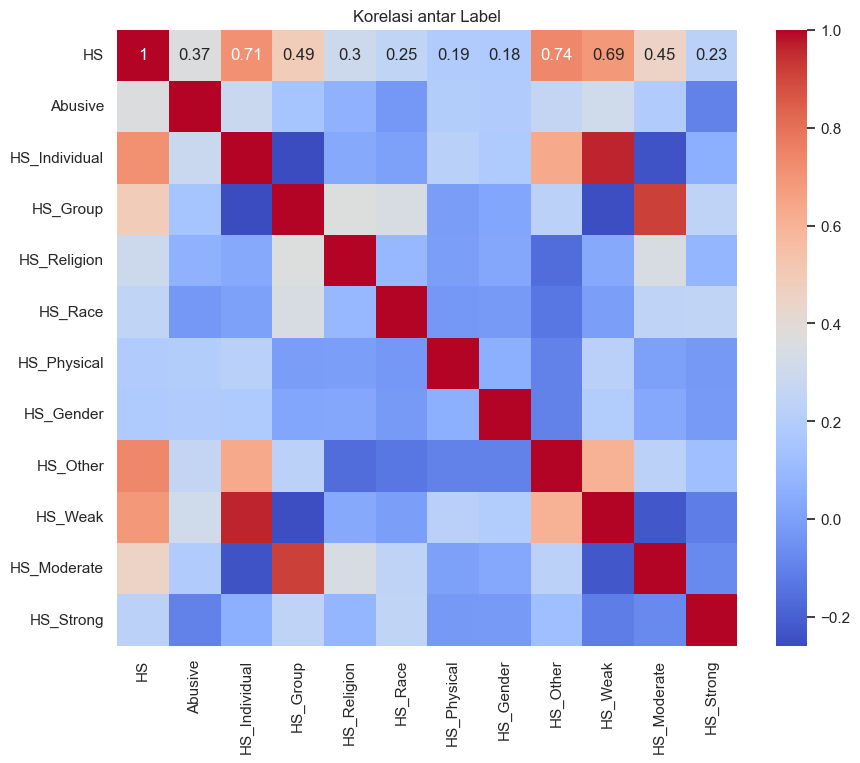

In [267]:
# Heatmap untuk melihat korelasi antar label
plt.figure(figsize=(10, 8))
sns.heatmap(df_data[labels].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar Label")
plt.show()

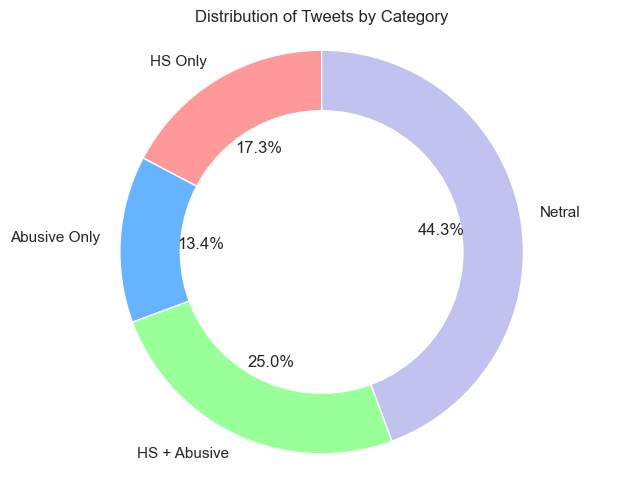

In [268]:
# Visualisasi Data Pie Chart
# Menghitung jumlah tweets per kategori
hs_count = df_data[(df_data['HS'] == 1) & (df_data['Abusive'] == 0)].shape[0]
abusive_count = df_data[(df_data['Abusive'] == 1) & (df_data['HS'] == 0)].shape[0]
hs_abusive_count = df_data[(df_data['HS'] == 1) & (df_data['Abusive'] == 1)].shape[0]
netral_count = df_data[(df_data['HS'] == 0) & (df_data['Abusive'] == 0)].shape[0]

# Labels untuk pie chart
labels = ['HS Only', 'Abusive Only', 'HS + Abusive', 'Netral']

sizes = [hs_count, abusive_count, hs_abusive_count, netral_count]

colors = ['#ff9999','#66b3ff','#99ff99', '#c2c2f0']

# Membuat pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Distribution of Tweets by Category')
plt.show()


In [269]:
# Menghitung mean dari panjang karakter tweet
mean_tweet_length = df_data['Tweet'].apply(len).mean()
print("Mean Tweet Length:", mean_tweet_length)

# Mencari modus dari kata-kata yang paling sering muncul dalam tweet yang mengandung hate speech
most_common_words_hs = df_data[df_data['HS'] == 1]['Tweet'].str.split().explode().mode()
print("Modus Hate Speech Words:", most_common_words_hs)

# Menghitung maksimum dari jumlah kata dalam tweet abusive language
max_words_abusive = df_data[df_data['Abusive'] == 1]['Tweet'].str.split().apply(len).max()
print("Maximum Number of Words in Abusive Language Tweets:", max_words_abusive)


Mean Tweet Length: 114.12434835939895
Modus Hate Speech Words: 0    USER
Name: Tweet, dtype: object
Maximum Number of Words in Abusive Language Tweets: 52
